# Jupyter Notebook

This is a Jupyter Notebook, which is a basically just a super fancy Python shell.

You may have "cells" that can either be text (like this one) or executable Python code. Notebooks are really nice because they allow you to rapidly develop Python code by writing small bits of code, testing their output, and moving on to the next bit; this interactive nature of the notebook is a huge plus to professional Python developers. 

It's also nice, because it's really easy to share your code with others and surround it with text to tell a story! 

# Colaboratory
Colaboratory is a service provided by Google to take a Jupyter Notebook (a standard formay of a `.ipynb` file) and let users edit/run the code in the notebook for free! 

This notebook is write-protected so you are not able to edit the  notebook that the whole class will look at, but you are able to open up the notebook in "playground mode" which lets you make edits to a temporary copy of the notebook. If you want to save the changes you made to this notebook, you will have to follow the instructions when you try to save to copy the notebook to your Google Drive. 

# Setup
Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.


In [0]:
import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-22/dog.jpg', 'dog.jpg')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-22/dog2.jpg', 'dog2.jpg')

In [0]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

# Last Time

[[ 93  89  85 ... 167 167 167]
 [ 93  90  86 ... 166 166 166]
 [ 92  90  87 ... 165 165 165]
 ...
 [149 132 111 ... 175 173 170]
 [113 123 129 ... 174 171 168]
 [ 91 118 143 ... 173 170 166]]


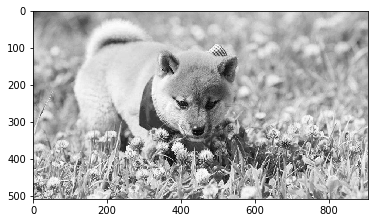

In [0]:
dog = imageio.imread('dog2.jpg')
print(dog)
plt.imshow(dog, cmap=plt.cm.gray)

The `cmap` parameter value tells `matplotlib` we want to plot this as a gray-scale image. If we leave it off, we get this instead

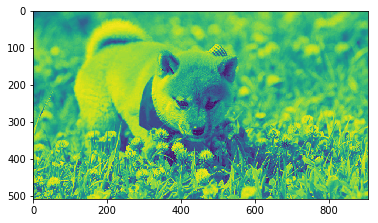

In [0]:
dog = imageio.imread('dog2.jpg')
plt.imshow(dog)

# Color Images
We can also read in and plot color images. Note we don't need to pass a color-map because `matplotlib` has a check for the special case of images like this.

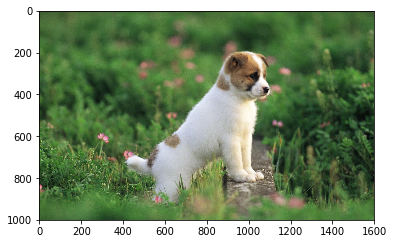

In [0]:
dog = imageio.imread('dog.jpg')
plt.imshow(dog)

The color image is stored differently than a gray-scale. Instead of being a 2-d matrix with shape `(height, width)`, a color image is a 3-d array with shape `(height, width, depth)`. Depth indicates the number of color channels in the image which is commonly 3; one channel for red, one for green, and one for blue.

In [0]:
print(dog.shape)

(1000, 1600, 3)


We can index into a color image just like any other numpy array, but now we must provide 3 arguments

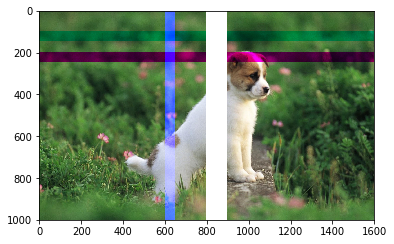

In [0]:
dog = imageio.imread('dog.jpg')

dog[100:150, :, 0] = 0
dog[200:250, :, 1] = 0

dog[:, 600:650, 2] = 255

dog[:, 800:900, :] = 255


plt.imshow(dog)

# Selectively Darkening Pixesl
For this example, we wanted to make a circle around the center of the image with diameter that is the height of time image to highlight the dog.

We had to use the Pythagorean theorem to find the distance from the center taking the square root of the distances in each dimension squared (in equation $\sqrt{(x - center_{x})^2 + (y - center_{y})^2}$.

We first solved this with a loop approach that iterated over the pixels, but we found this to be overly slow. Instead, there is a clever broadcasting trick we can do by making a list of xs that is a horizontal array and a list of ys that is a vertical array and broadcast them across eachother to get all pairings of x/y without a loop! This trick was pretty subtle and we do not expect you to be able to come up with it on your own.

**Note:** I mean to have these functions create new images, so I've added a line to create a copy of the image to mody.

In [0]:
def circle(img):
  height, width, depth = img.shape
  
  center_x = width / 2
  center_y = height / 2
  
  result = img.copy()
  
  for y in range(height):
    for x in range(width):
      dist = math.sqrt((y - center_y) ** 2 + (x - center_x) ** 2)
      if dist > center_y:
        # Can "dim" the image by making it darker instead of setting to 0
        # result[y, x, :] = img[y, x, :] * 0.5
        result[y, x, :] = 0
  return result
        
def circle_fast(img):
  height, width, depth = img.shape
  
  center_x = width / 2
  center_y = height / 2
  
  xs = np.arange(width)
  ys = np.arange(height).reshape((height, 1))
  
  distances = np.sqrt((ys - center_y) ** 2 + (xs - center_x) ** 2)
  
  result = img.copy()
  result[distances > center_y, :] = 0
  return result

CPU times: user 5.12 s, sys: 58.5 ms, total: 5.18 s
Wall time: 4.51 s


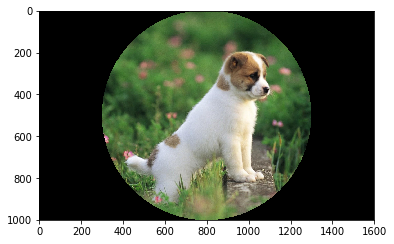

In [0]:
%%time
dog = imageio.imread('dog.jpg')
dog_circle = circle(dog)
plt.imshow(dog_circle)

CPU times: user 422 ms, sys: 27 ms, total: 449 ms
Wall time: 138 ms


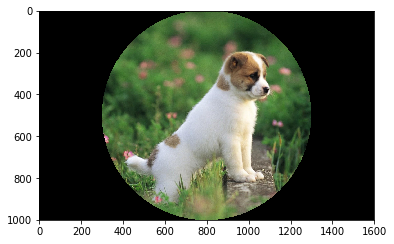

In [0]:
%%time
dog = imageio.imread('dog.jpg')
dog_circle = circle_fast(dog)
plt.imshow(dog_circle)